<a href="https://colab.research.google.com/github/mark1702/mark/blob/master/hoc_may_thong_ke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the and function

In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

In [ ]:
for i in range(len(X)):
    print(X[i], y[i])

[0 0] 0
[0 1] 0
[1 0] 0
[1 1] 1


In [ ]:
def add_noise_data(input_data, input_labels, n_points, mean, scale):
    """
    Create a noise verstion of the input data

    Params:
        input_data: base input data
        input_labels: base input labels
        n_points: the number of needed points
        mean, scale: the gaussian data
    """
    raw_X = []
    raw_labels = []

    noise = np.random.normal(loc=mean, scale=scale, size=(n_points, 2))
    for i in range(n_points):
        k = np.random.randint(len(input_data))

        raw_X.append([input_data[k][0] + noise[i][0],
                      input_data[k][1] + noise[i][1]])

        raw_labels.append(input_labels[k])

    return np.array(raw_X), np.array(raw_labels)

In [ ]:
X_noise, y_noise = add_noise_data(X, y, 100, 0., 0.2)

In [ ]:
def plot_clusters(_x, labels, std, list_labels = ['False', 'True']):
    colors = ['#4EACC5', '#FF9C34']
    y_m = labels
    for k, col in zip(range(len(labels)), colors):
        my_members = y_m == k
        print(_x[my_members].shape)
        plt.scatter(_x[my_members, 0], _x[my_members, 1], marker='o', label = list_labels[k])
    plt.title('Noisy AND dataset with std = %.1f' % std)
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

(82, 2)
(18, 2)


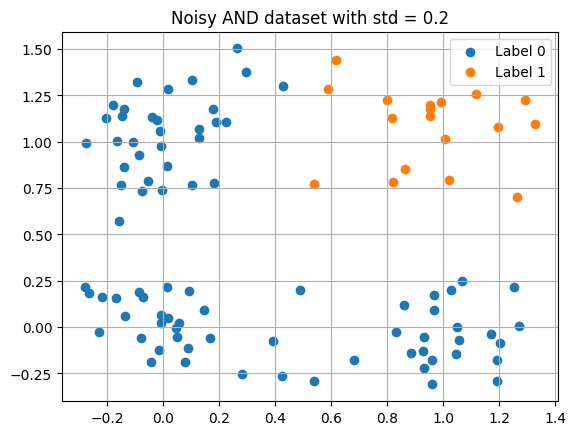

In [ ]:
plot_clusters(X_noise, y_noise, 0.2, list_labels=['Label 0', 'Label 1'])

(158, 2)
(42, 2)


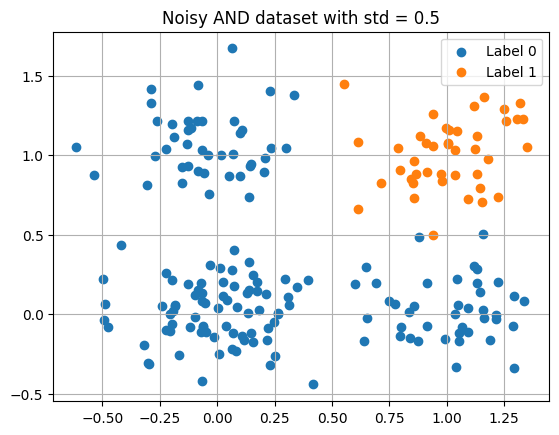

In [ ]:
X_high_noise, y_high_noise = add_noise_data(X, y, 200, 0., 0.2)
plot_clusters(X_high_noise, y_high_noise, 0.5, list_labels=['Label 0', 'Label 1'])

In [ ]:
for i in range(20):
    print('(%.1f, %.1f)' % (X_high_noise[i][0], X_high_noise[i][1]), y_high_noise[i])

(1.1, 0.7) 1
(0.3, 0.2) 0
(-0.2, -0.2) 0
(0.1, 1.1) 0
(1.0, -0.1) 0
(-0.2, 1.4) 0
(1.1, 0.7) 1
(1.2, 1.0) 1
(0.1, 0.1) 0
(1.2, 0.9) 1
(1.0, -0.1) 0
(0.8, 1.1) 1
(1.3, -0.0) 0
(0.8, -0.2) 0
(-0.1, 1.1) 0
(0.1, -0.1) 0
(0.7, 0.7) 1
(1.0, 1.2) 1
(-0.2, -0.0) 0
(0.4, 0.9) 0


In [ ]:
for i in range(20):
    print('(%.1f, %.1f)' % (X_high_noise[i][0], X_high_noise[i][1]), y_high_noise[i])


y_high_noise = np.expand_dims(y_high_noise, axis=1)
# print(y_high_noise.shape)

(1.1, -0.2) 0
(1.1, 0.2) 0
(0.2, 1.0) 0
(0.8, 0.0) 0
(1.1, -0.1) 0
(0.9, 1.0) 1
(1.2, 0.8) 1
(0.9, -0.2) 0
(1.0, 1.0) 1
(0.0, 1.1) 0
(0.0, 0.5) 0
(-0.0, 0.1) 0
(1.1, 0.7) 1
(0.8, -0.1) 0
(0.3, -0.0) 0
(1.2, 1.1) 1
(-0.1, 0.6) 0
(0.2, 1.0) 0
(1.0, 0.8) 1
(-0.0, 0.1) 0


In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def derivative_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [ ]:
def plot_clusters_after_cluster(_x, labels, list_labels = ['False', 'True']):
    colors = ['#4EACC5', '#FF9C34', '#fff899']
    plt.scatter(_x[0], labels[0], marker='o', color=colors[0], label="Label 0 NG")
    plt.scatter(_x[1], labels[1], marker='o', color=colors[1], label="Label 1 NG")
    plt.scatter(_x[2], labels[2], marker='o', color=colors[2], label="Label OK")
    # plt.title('Noisy AND dataset with std = %.1f' % std)
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

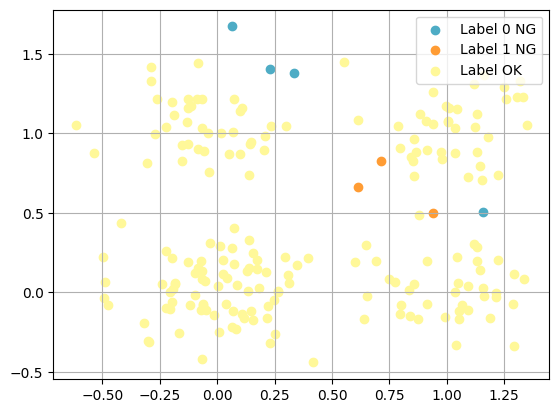

W: [[4.14092522 3.91966098]]
W0: [[-6.39521693]]
Error rate: 0.035


In [ ]:
epoch = 1000
lr = 0.01
w0 = np.random.randn(1, 1)
w = np.random.randn(1, 2)
# z = W.T * x + W0
# y_hat = sigmoid(z)
# loss = 0.5 * np.square(y_hat - y)
# dw = (y_hat - y) * sigmoid(z) * (1 - sigmoid(z)) * X
# dw0 = (y_hat - y) * sigmoid(z) * (1 - sigmoid(z)) * 1
out_array = []
for iter in range(epoch):
    for idx, x_noise in enumerate(X_high_noise):
        z = np.add(np.dot(x_noise, w.T), w0)
        y_hat = sigmoid(z)
        loss = 0.5 * np.square(y_hat - y_high_noise[idx])
        dw = (y_hat - y_high_noise[idx]) * sigmoid(z) * (1 - sigmoid(z)) * x_noise
        dw0 = (y_hat - y_high_noise[idx]) * sigmoid(z) * (1 - sigmoid(z)) * 1
        w -= lr * dw
        w0 -= lr * dw0
        if iter == epoch - 1:
          out_array.append([x_noise[0], x_noise[1], y_hat[0][0], y_high_noise[idx]])
          # print(f"epoch {iter}: loss:{loss}. Raw {y_high_noise[idx]} Predict {y_hat}")
out_array = np.array(out_array)
x_0_ng = out_array[(np.absolute(out_array[:,3] - out_array[:,2]) > 0.5) & (out_array[:,3] == 0)][:,0]
y_0_ng = out_array[(np.absolute(out_array[:,3] - out_array[:,2]) > 0.5) & (out_array[:,3] == 0)][:,1]
x_1_ng = out_array[(np.absolute(out_array[:,3] - out_array[:,2]) > 0.5) & (out_array[:,3] == 1)][:,0]
y_1_ng = out_array[(np.absolute(out_array[:,3] - out_array[:,2]) > 0.5) & (out_array[:,3] == 1)][:,1]
x_ok = out_array[(np.absolute(out_array[:,3] - out_array[:,2]) <= 0.5)][:,0]
y_ok = out_array[(np.absolute(out_array[:,3] - out_array[:,2]) <= 0.5)][:,1]
plot_clusters_after_cluster((x_0_ng, x_1_ng, x_ok), (y_0_ng, y_1_ng, y_ok))
print("W:", w)
print("W0:", w0)
print("Error rate: {}".format((np.absolute(out_array[:,3] - out_array[:,2]) > 0.5).sum() / len(X_high_noise)))

z = W.T * x + W0
y_hat = sigmoid(z)
loss = 0.5 * np.square(y_hat - y)
dw = (y_hat - y) * sigmoid(z) * (1 - sigmoid(z)) * X
dw0 = (y_hat - y) * sigmoid(z) * (1 - sigmoid(z)) * 1

In [ ]:
# create random data
X_high_noise, y_high_noise = add_noise_data(X, y, 100, 0., 0.2)
plot_clusters(X_high_noise, y_high_noise, 0.2, list_labels=['Label 0', 'Label 1'])
y_high_noise_expandims = np.expand_dims(y_high_noise, axis=1)

epoch = 10000
lr = 0.01
w0 = np.random.randn(1, 1)
w = np.random.randn(1, 2)

out_array = []
for iter in range(epoch):
    loss = 0
    for idx, x_noise in enumerate(X_high_noise):
        z = np.add(np.dot(x_noise, w.T), w0)
        y_hat = sigmoid(z)
        loss += 0.5 * np.square(y_hat - y_high_noise_expandims[idx])
        dw = (y_hat - y_high_noise_expandims[idx]) * sigmoid(z) * (1 - sigmoid(z)) * x_noise
        dw0 = (y_hat - y_high_noise_expandims[idx]) * sigmoid(z) * (1 - sigmoid(z)) * 1
        w -= lr * dw
        w0 -= lr * dw0
    loss /= len(X_high_noise)
    if loss < 2e-2:
        print(f'break {iter}')
        break
        # if iter == epoch - 1:
        #   out_array.append([x_noise[0], x_noise[1], y_hat[0][0], y_high_noise[idx]])
        # print(f"epoch {iter}: loss:{loss}. Raw {y_high_noise[idx]} Predict {y_hat}")

for idx, x_noise in enumerate(X_high_noise):
    z = np.add(np.dot(x_noise, w.T), w0)
    y_hat = sigmoid(z)
    out_array.append([x_noise[0], x_noise[1], y_hat[0][0], y_high_noise_expandims[idx]])
out_array = np.array(out_array)
x_0_ng = out_array[(np.absolute(out_array[:,3] - out_array[:,2]) > 0.5) & (out_array[:,3] == 0)][:,0]
y_0_ng = out_array[(np.absolute(out_array[:,3] - out_array[:,2]) > 0.5) & (out_array[:,3] == 0)][:,1]
x_1_ng = out_array[(np.absolute(out_array[:,3] - out_array[:,2]) > 0.5) & (out_array[:,3] == 1)][:,0]
y_1_ng = out_array[(np.absolute(out_array[:,3] - out_array[:,2]) > 0.5) & (out_array[:,3] == 1)][:,1]
x_ok = out_array[(np.absolute(out_array[:,3] - out_array[:,2]) <= 0.5)][:,0]
y_ok = out_array[(np.absolute(out_array[:,3] - out_array[:,2]) <= 0.5)][:,1]

print("--------------------")
plot_clusters_after_cluster((x_0_ng, x_1_ng, x_ok), (y_0_ng, y_1_ng, y_ok))
print("W:", w)
print("W0:", w0)
print("Error rate: {}".format((np.absolute(out_array[:,3] - out_array[:,2]) > 0.5).sum() / len(X_high_noise)))

In [ ]:
loop = 1
running_seed = 100
threshold = 0.1
out_array_test = []
avg_error = 0
for iter in range(loop):
    count_err = 0
    avg_error = 0
    for seed in range(running_seed):
        out_array_test.clear()
        X_high_noise, y_high_noise = add_noise_data(X, y, 100, 0., 0.3)
        # plot_clusters(X_high_noise, y_high_noise, 0.2, list_labels=['Label 0', 'Label 1'])
        y_high_noise_expandims = np.expand_dims(y_high_noise, axis=1)
        for idx, x_noise in enumerate(X_high_noise):
            z = np.add(np.dot(x_noise, w.T), w0)
            y_hat = sigmoid(z)
            out_array_test.append([x_noise[0], x_noise[1], y_hat[0][0], y_high_noise_expandims[idx]])
        out_array = np.array(out_array_test)
        x_0_ng = out_array[(np.absolute(out_array[:,3] - out_array[:,2]) > 0.5) & (out_array[:,3] == 0)][:,0]
        y_0_ng = out_array[(np.absolute(out_array[:,3] - out_array[:,2]) > 0.5) & (out_array[:,3] == 0)][:,1]
        x_1_ng = out_array[(np.absolute(out_array[:,3] - out_array[:,2]) > 0.5) & (out_array[:,3] == 1)][:,0]
        y_1_ng = out_array[(np.absolute(out_array[:,3] - out_array[:,2]) > 0.5) & (out_array[:,3] == 1)][:,1]
        x_ok = out_array[(np.absolute(out_array[:,3] - out_array[:,2]) <= 0.5)][:,0]
        y_ok = out_array[(np.absolute(out_array[:,3] - out_array[:,2]) <= 0.5)][:,1]
        # print("--------------------")
        # plot_clusters_after_cluster((x_0_ng, x_1_ng, x_ok), (y_0_ng, y_1_ng, y_ok))
        error_d = (np.absolute(out_array[:,3] - out_array[:,2]) > 0.5).sum() / len(X_high_noise)
        avg_error += error_d
        count_err += 1 if error_d > threshold else 0
    print(f"iter {iter} P_Error: {count_err / running_seed} avg_Error:{avg_error / running_seed}")
    # print("Seed:{} - Error rate: {}".format(seed, ))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
lr = 0.01
x_1 = -5
x_2 = -5
x_list = [x_1]
y_list = [x_2]
for i in range(10000):
    d_x1 = 4 * x_1 - 2 * x_2 ** 2 - 2 * x_2 - 8
    d_x2 = 4 * x_2 ** 3 + 14 * x_2 - 4 * x_1 * x_2 - 2 * x_1 + 2
    x_1 -= lr * d_x1
    x_2 -= lr * d_x2
    z = (x_1 - x_2 ** 2 - 3) ** 2 + (x_1 - x_2 - 1) ** 2
    x_list.append(x_1)
    y_list.append(x_2)

xlist = np.array(x_list)
ylist = np.array(y_list)
X, Y = np.meshgrid(xlist, ylist)
Z = np.square(X - np.square(Y) - 3) + np.square(X - Y - 1)
fig,ax=plt.subplots(1,1)
# plt.scatter(X, Y)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
plt.show()